In [203]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns
# conda install -c conda-forge mlxtend
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [202]:
from google.colab import files
uploaded = files.upload()

Saving my_movies.csv to my_movies (7).csv


In [204]:
df = pd.read_csv('my_movies.csv')
df.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


# Data Pre-Processing

#### As the data is not in transaction formation We are using transaction Encoder

In [205]:
df=pd.get_dummies(df)
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


# Data Exploration

In [206]:
count = df.iloc[:,:].sum()
count

Sixth Sense         6
Gladiator           7
LOTR1               2
Harry Potter1       2
Patriot             6
LOTR2               2
Harry Potter2       1
LOTR                1
Braveheart          1
Green Mile          2
V1_Gladiator        6
V1_Harry Potter1    1
V1_LOTR1            1
V1_Sixth Sense      2
V2_Harry Potter2    1
V2_LOTR             1
V2_LOTR1            1
V2_LOTR2            1
V2_Patriot          6
V3_Braveheart       1
V3_Gladiator        1
V3_Harry Potter1    1
V3_Sixth Sense      4
V4_Green Mile       2
V5_LOTR2            1
dtype: int64

In [207]:
df.shape

(10, 25)

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Sixth Sense       10 non-null     int64
 1   Gladiator         10 non-null     int64
 2   LOTR1             10 non-null     int64
 3   Harry Potter1     10 non-null     int64
 4   Patriot           10 non-null     int64
 5   LOTR2             10 non-null     int64
 6   Harry Potter2     10 non-null     int64
 7   LOTR              10 non-null     int64
 8   Braveheart        10 non-null     int64
 9   Green Mile        10 non-null     int64
 10  V1_Gladiator      10 non-null     uint8
 11  V1_Harry Potter1  10 non-null     uint8
 12  V1_LOTR1          10 non-null     uint8
 13  V1_Sixth Sense    10 non-null     uint8
 14  V2_Harry Potter2  10 non-null     uint8
 15  V2_LOTR           10 non-null     uint8
 16  V2_LOTR1          10 non-null     uint8
 17  V2_LOTR2          10 non-null     uint

In [209]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print()

Sixth Sense
1    6
0    4
Name: Sixth Sense, dtype: int64

Gladiator
1    7
0    3
Name: Gladiator, dtype: int64

LOTR1
0    8
1    2
Name: LOTR1, dtype: int64

Harry Potter1
0    8
1    2
Name: Harry Potter1, dtype: int64

Patriot
1    6
0    4
Name: Patriot, dtype: int64

LOTR2
0    8
1    2
Name: LOTR2, dtype: int64

Harry Potter2
0    9
1    1
Name: Harry Potter2, dtype: int64

LOTR
0    9
1    1
Name: LOTR, dtype: int64

Braveheart
0    9
1    1
Name: Braveheart, dtype: int64

Green Mile
0    8
1    2
Name: Green Mile, dtype: int64

V1_Gladiator
1    6
0    4
Name: V1_Gladiator, dtype: int64

V1_Harry Potter1
0    9
1    1
Name: V1_Harry Potter1, dtype: int64

V1_LOTR1
0    9
1    1
Name: V1_LOTR1, dtype: int64

V1_Sixth Sense
0    8
1    2
Name: V1_Sixth Sense, dtype: int64

V2_Harry Potter2
0    9
1    1
Name: V2_Harry Potter2, dtype: int64

V2_LOTR
0    9
1    1
Name: V2_LOTR, dtype: int64

V2_LOTR1
0    9
1    1
Name: V2_LOTR1, dtype: int64

V2_LOTR2
0    9
1    1
Name: V2_LOT

# Data Visualization

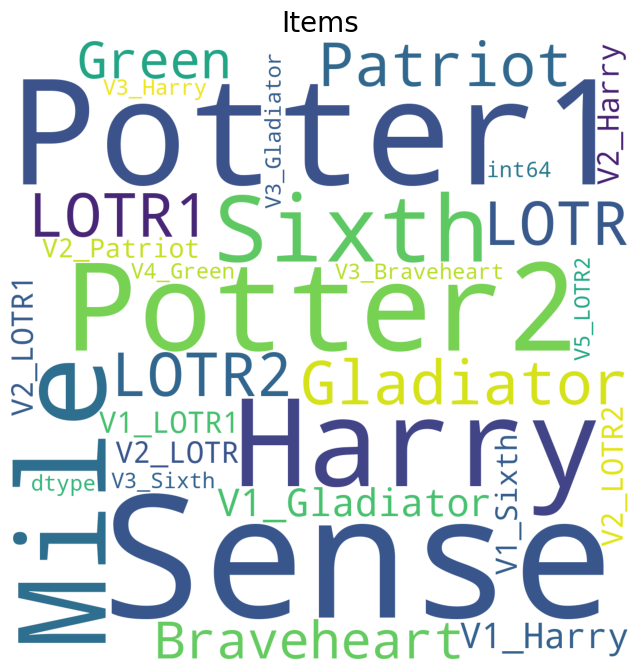

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (8, 12)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(df.sum()))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Items',fontsize = 20)
plt.show()

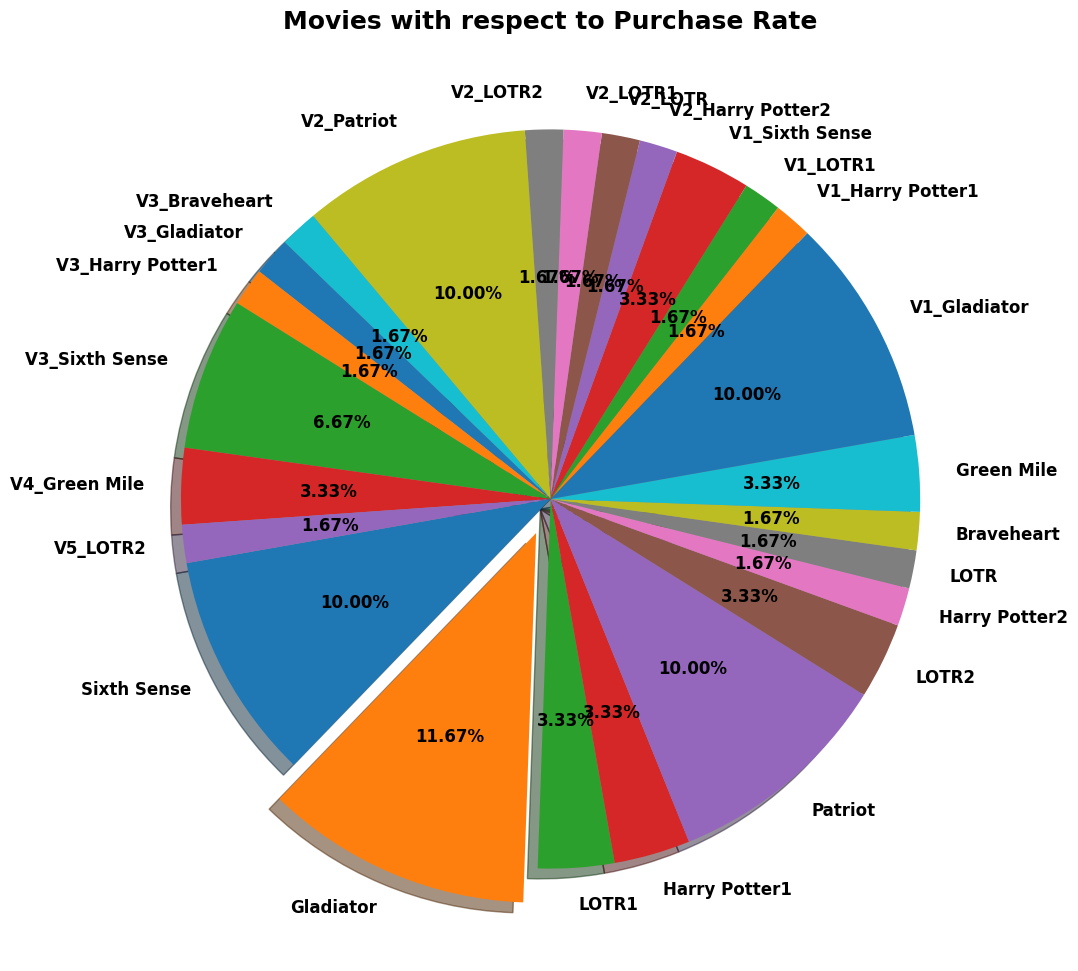

In [211]:
plt.figure(figsize = (12,12))
plt.pie(df.sum(),
       labels=df.columns,
       explode = [0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Movies with respect to Purchase Rate", fontsize = 18, fontweight = 'bold')
plt.show()

In [212]:
# Top 10 Popular items
count.sort_values(0, ascending = False, inplace=True)
count = count.to_frame().reset_index()
count = count.rename(columns = {'index': 'items',0: 'count'})
count

,items,count
0,Gladiator,7
1,Sixth Sense,6
2,Patriot,6
3,V1_Gladiator,6
4,V2_Patriot,6
5,V3_Sixth Sense,4
6,LOTR1,2
7,Harry Potter1,2
8,LOTR2,2
9,V4_Green Mile,2


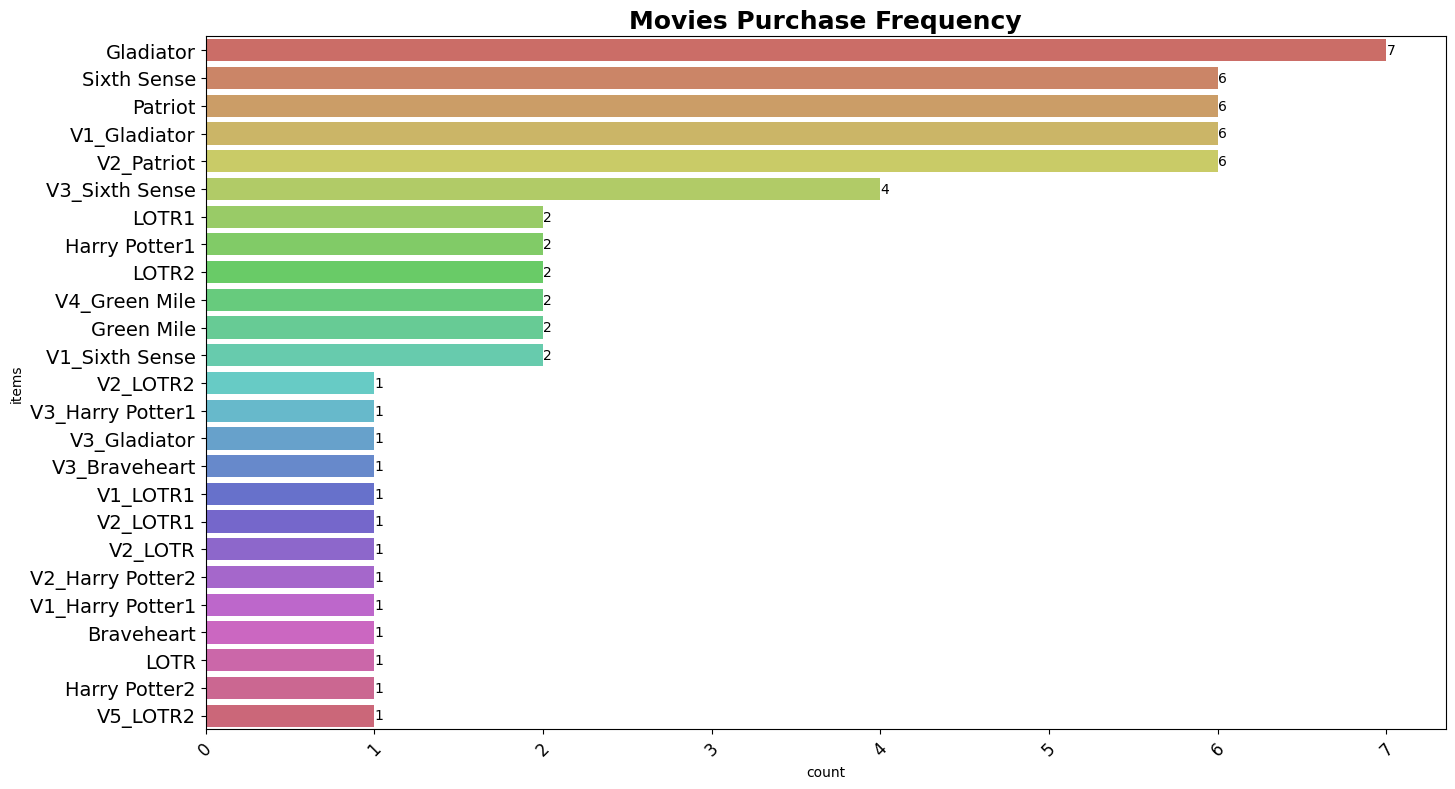

In [213]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = 'count', y = 'items', data= count, palette="hls")
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Movies Purchase Frequency',  fontsize = 18, fontweight = 'bold')
# Add labels to each bar
for i in ax.containers:
    ax.bar_label(i,)
# Show the plot
plt.show()

#### **Most Frequent Bought Books are : Gladiator and Sixth Sense**

# Apriori Algorithm

#### **1. Association rules with 10% Support and 70% confidence**

In [214]:
# With 10% Support
frequent_itemsets=apriori(df,min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(V1_Sixth Sense, LOTR1, Harry Potter1, V5_LOTR..."
1393,0.1,"(LOTR2, V1_Sixth Sense, LOTR1, V5_LOTR2, V4_Gr..."
1394,0.1,"(LOTR2, V1_Sixth Sense, Harry Potter1, V5_LOTR..."
1395,0.1,"(LOTR2, V1_Sixth Sense, LOTR1, Harry Potter1, ..."


In [215]:
# with 70% confidence
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,-0.333333
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
...,...,...,...,...,...,...,...,...,...,...
64247,(V4_Green Mile),"(LOTR2, LOTR1, V1_Sixth Sense, Harry Potter1, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
64248,(V3_Harry Potter1),"(LOTR2, LOTR1, V1_Sixth Sense, Harry Potter1, ...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
64249,(Green Mile),"(LOTR2, LOTR1, V1_Sixth Sense, Harry Potter1, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
64250,(Sixth Sense),"(LOTR2, LOTR1, V1_Sixth Sense, Harry Potter1, ...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000


#### A leverage value of 0 indicates independence. Range will be [-1 1]
#### A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [216]:
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
32126,"(LOTR2, V5_LOTR2, Green Mile, V3_Harry Potter1)","(Harry Potter1, Sixth Sense, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
42207,"(Harry Potter1, LOTR2, V5_LOTR2, V2_LOTR1)","(LOTR1, V1_Sixth Sense, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
42195,"(Harry Potter1, LOTR2, V1_Sixth Sense, Green M...","(V2_LOTR1, V5_LOTR2, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
42196,"(Harry Potter1, LOTR2, V2_LOTR1, V1_Sixth Sense)","(V5_LOTR2, LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
42197,"(LOTR2, V5_LOTR2, V1_Sixth Sense, Green Mile)","(Harry Potter1, V2_LOTR1, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
219,(Gladiator),"(Sixth Sense, Green Mile)",0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333,-0.571429
683,"(Green Mile, V4_Green Mile)",(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000,-0.333333
226,"(Sixth Sense, V1_Sixth Sense)",(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000,-0.333333
231,(Gladiator),"(Sixth Sense, V1_Sixth Sense)",0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333,-0.571429


In [217]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444
...,...,...,...,...,...,...,...,...,...,...
64247,(V4_Green Mile),"(LOTR2, LOTR1, V1_Sixth Sense, Harry Potter1, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
64248,(V3_Harry Potter1),"(LOTR2, LOTR1, V1_Sixth Sense, Harry Potter1, ...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
64249,(Green Mile),"(LOTR2, LOTR1, V1_Sixth Sense, Harry Potter1, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
64250,(Sixth Sense),"(LOTR2, LOTR1, V1_Sixth Sense, Harry Potter1, ...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000


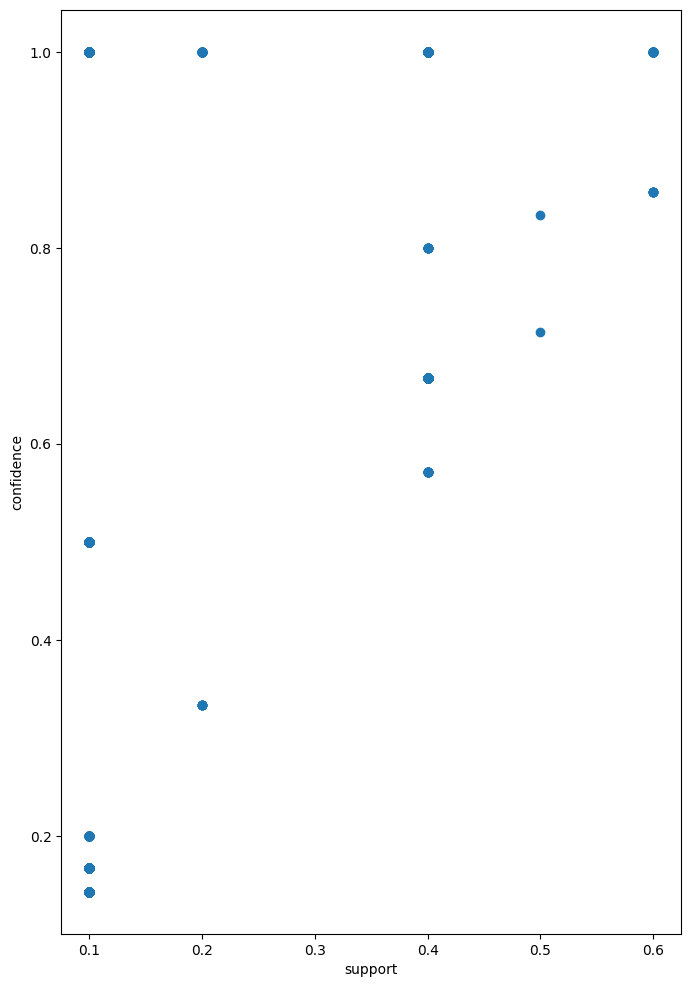

In [218]:
# visualization of obtained rule
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

#### **2. Association rules with 20% Support and 60% confidence**

In [219]:
# With 20% Support
frequent_itemsets2=apriori(df,min_support=0.20,use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
76,0.4,"(Gladiator, Patriot, V3_Sixth Sense, Sixth Sen..."
77,0.4,"(Gladiator, V1_Gladiator, V3_Sixth Sense, Sixt..."
78,0.4,"(Patriot, V1_Gladiator, V3_Sixth Sense, Sixth ..."
79,0.4,"(Gladiator, Patriot, V1_Gladiator, V3_Sixth Se..."


In [220]:
# With 60% confidence
rules2=association_rules(frequent_itemsets2,metric='lift',min_threshold=0.6)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
...,...,...,...,...,...,...,...,...,...,...
649,(Patriot),"(Gladiator, V1_Gladiator, V3_Sixth Sense, Sixt...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8,1.000000
650,(V1_Gladiator),"(Gladiator, Patriot, V3_Sixth Sense, Sixth Sen...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8,1.000000
651,(V3_Sixth Sense),"(Gladiator, Patriot, V1_Gladiator, Sixth Sense...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf,1.000000
652,(Sixth Sense),"(Gladiator, Patriot, V1_Gladiator, V3_Sixth Se...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8,1.000000


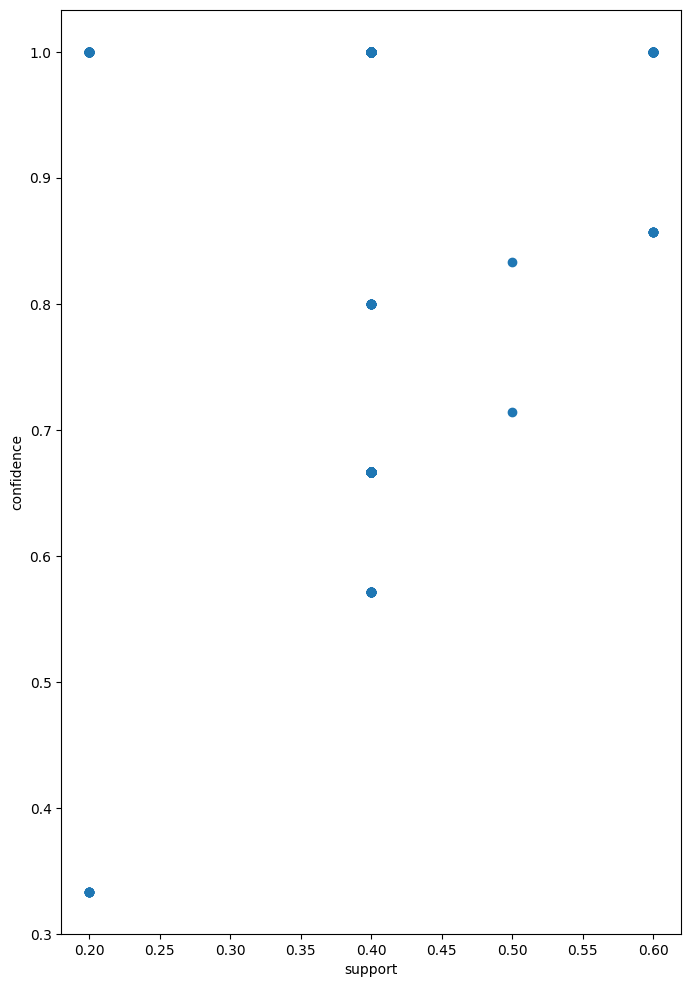

In [221]:
# visualization of obtained rule
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

#### **3. Association rules with 5% Support and 80% confidence**

In [222]:
# With 5% Support
frequent_itemsets3=apriori(df,min_support=0.05,use_colnames=True)
frequent_itemsets3

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(V1_Sixth Sense, LOTR1, Harry Potter1, V5_LOTR..."
1393,0.1,"(LOTR2, V1_Sixth Sense, LOTR1, V5_LOTR2, V4_Gr..."
1394,0.1,"(LOTR2, V1_Sixth Sense, Harry Potter1, V5_LOTR..."
1395,0.1,"(LOTR2, V1_Sixth Sense, LOTR1, Harry Potter1, ..."


In [223]:
# With 80% confidence
rules3=association_rules(frequent_itemsets3,metric='lift',min_threshold=0.8)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,-0.333333
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
...,...,...,...,...,...,...,...,...,...,...
64219,(V4_Green Mile),"(LOTR2, LOTR1, V1_Sixth Sense, Harry Potter1, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
64220,(V3_Harry Potter1),"(LOTR2, LOTR1, V1_Sixth Sense, Harry Potter1, ...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
64221,(Green Mile),"(LOTR2, LOTR1, V1_Sixth Sense, Harry Potter1, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
64222,(Sixth Sense),"(LOTR2, LOTR1, V1_Sixth Sense, Harry Potter1, ...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000


In [224]:
rules3[rules3.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444
...,...,...,...,...,...,...,...,...,...,...
64219,(V4_Green Mile),"(LOTR2, LOTR1, V1_Sixth Sense, Harry Potter1, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
64220,(V3_Harry Potter1),"(LOTR2, LOTR1, V1_Sixth Sense, Harry Potter1, ...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
64221,(Green Mile),"(LOTR2, LOTR1, V1_Sixth Sense, Harry Potter1, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
64222,(Sixth Sense),"(LOTR2, LOTR1, V1_Sixth Sense, Harry Potter1, ...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000


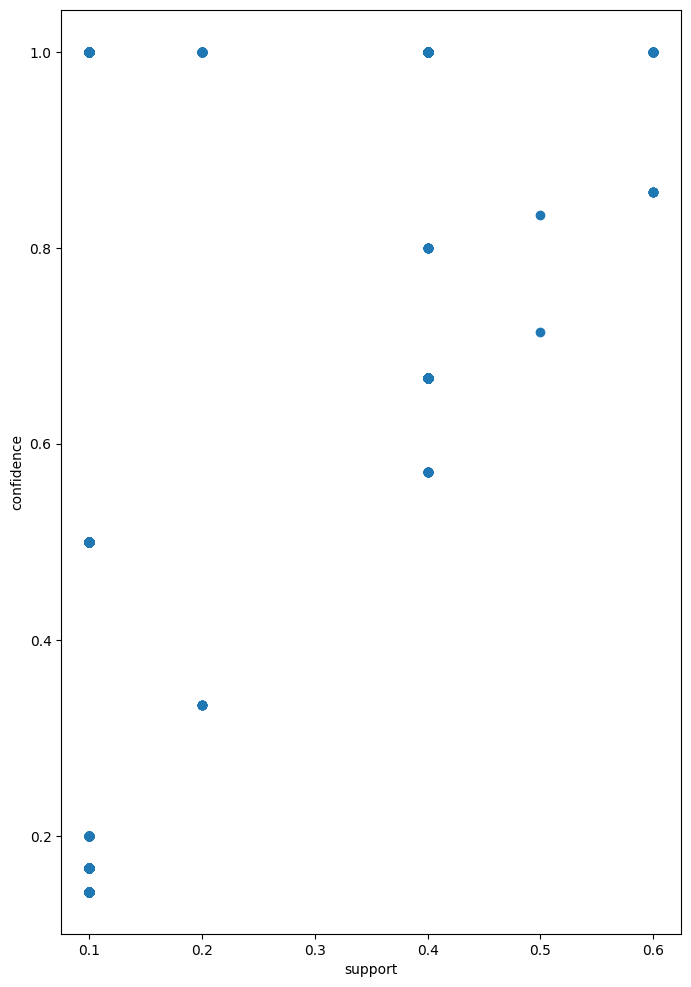

In [225]:
# visualization of obtained rule
plt.scatter(rules3['support'],rules3['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()
